# EL JUEGO DE LA VIDA
## Carlos Mateo Beltran.
En su versión original, las reglasdel juego son:

•Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente
estará viva).

•Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o
"superpoblación").

Las celulas vivas seran representadas por el color negro, las muertas o, no vivas, seran representadas por el color blanco.

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import *
import matplotlib.gridspec as gridspec
from time import sleep
from matplotlib import animation
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib notebook
import random

In [7]:
def funcionvecinos(Matr):
    'Esta funcion recibe la matriz random de orden n cuadrado, el n es el que se quiera'
    L=[] #Se crean 3 listas vacias
    T=[]
    LMatr=[]
    for elemento in np.nditer(Matr,order='F'): #este bucle convierte la matriz que entra en la funcion en una lista, recorre la matriz por columnas
        LMatr.append(int(elemento))
    Md=np.roll(Matr,axis=-1,shift=1)    # mueve a la derecha el arreglo inicial
    Miz=np.roll(Matr,axis=-1,shift=-1)  # mueve a la izquierda el arreglo inicial
    Mb=np.roll(Matr,axis=0,shift=1)     # baja el arreglo inicial
    Ms=np.roll(Matr,axis=0,shift=-1)    # sube el arreglo inicial
    Msiz=np.roll(Ms,axis=-1,shift=-1)   # sube y mueve a la izquierda el arreglo inicial
    Mbiz=np.roll(Mb,axis=-1,shift=-1)   # baja y mueve a la izquierda el arreglo inicial
    Msd=np.roll(Ms,axis=-1,shift=1)     # sube y mueve a la derecha el arreglo inicial
    Mbd=np.roll(Mb,axis=-1,shift=1)     # baja y mueve a la derecha el arreglo inicial
    Mvecino= Md+Miz+Mb+Ms+Msiz+Mbiz+Msd+Mbd     # Cuenta todos los vecinos que tiene cada posicion en la matriz, pero hay un error en los bordes del arreglo, cuenta vecinos que en realidad no lo son
    n=np.size(Matr,0)                   # Como la matriz es cuadrada, solo se necesita el tamaño, la dimension de las columnas, que es el mismo que el numero de filas.
    Mvcorr=np.zeros((n,n))              # se crea una matriz de ceros de la misma dimension de la que entra
    Mvcorr[0,0]=Miz[0,0]+Ms[0,0]+Msiz[0,0]  # se corregiran los bordes de la matriz que calcula la cantidad de vecinos, empezamos por la esquina superior izquierda del arreglo inicial
    Mvcorr[0,n-1]=Md[0,n-1]+Ms[0,n-1]+Msd[0,n-1] # se continua con la esquina superior derecha 
    Mvcorr[n-1,0]=Mb[n-1,0]+Mbiz[n-1,0]+Miz[n-1,0]  # ahora la esquina inferior izquierda
    Mvcorr[n-1,n-1]=Mb[n-1,n-1]+Mbd[n-1,n-1]+Md[n-1,n-1] # y por ultimo la esquina inferior derecha
    
    for i in range(1,n-1):          # este bucle arregla todo el borde, sin las esquinas, pues las esquinas ya se corrigieron, y no se corrigen aqui porque puede que presente problemas con las esquinas, que se sumen terminos de mas
        Mvcorr[0,i]=Ms[0,i]+Msiz[0,i]+Msd[0,i]+Miz[0,i]+Md[0,i]
        Mvcorr[n-1,i]=Mb[n-1,i]+Mbiz[n-1,i]+Mbd[n-1,i]+Miz[n-1,i]+Md[n-1,i]
        Mvcorr[i,0]=Miz[i,0]+Msiz[i,0]+Ms[i,0]+Mb[i,0]+Mbiz[i,0]
        Mvcorr[i,n-1]=Md[i,n-1]+Ms[i,n-1]+Mb[i,n-1]+Mbd[i,n-1]+Msd[i,n-1]
    
    #ya tenemos una matriz con bordes corregidos y el resto de componentes 0, entonces calcularemos la matriz contraria, la matriz que tenga un borde de 0 y que cuente todos los vecinos, correctamente, del resto de componentes, esto es, hacer 0 todo los bordes de la matriz que cuenta los vecino, la que se creo anteriormente
    # porque solo habia problemas en los bordes, entonces los hacemos 0 con este bucle
    for j in range(n):
        Mvecino[0,j]=0
        Mvecino[j,0]=0
        Mvecino[n-1,j]=0
        Mvecino[j,n-1]=0
   #Ya tenemos los bordes corregidos, y una matriz sin bordes, los sumamos y tenemos una matriz que cuente todos los vecino, una sin errores en los bordes     
    M=Mvecino+Mvcorr    
   

   #Con la matriz que cuenta todos los vecinos que tiene cada uno de las celulas en el arreglo, ahora queremos 
    #aplicar las condiciones para la cantidad de vecinos que cada celula tiene, para esto
    #haremos de nuestra matriz de vecinos una lista, y se listara nuevamente, por sus columnas
    for elemento in np.nditer(M,order='F'):
        L.append(int(elemento))
    
    #creamos un entero, el numero de elementos de la fila, el tamaño, claramente es n cuadrado
    # se hace esto para poder hacer otro bucle que recorrera la lista y hara que se cumplan las condiciones del juego
    h=np.size(L)
    
    for y in range(h):                # se usa la ultima lista vacia, para al final, crear una matriz que exprese los cambios del primer arreglo
        if (L[y]==2 and LMatr[y]==1): #condicion de mantener vivas las que tienen 2 vecinos
            T.append(1)
        elif(L[y]==3):                #condicion de mantener vivas las que tienen 3 vecinos y de que nazcan, las que tienen exactamente 3 vecinos. 
            T.append(1)
        else :
            T.append(0)              #Condicion de mortalidad por sobrepoblacion o por soledad
    MN=np.array(T).reshape(n,n)      #se transforma la lista que llenamos en el bucle anterior con la nueva configuracion en una matriz, pero esta matriz no es la que esperamos, es su traspuesta, por como se lee las matrices como listas.       
    NM=MN.transpose()                # Se calcula la traspuesta de la matriz que obtenemos al convertir la lista en una matriz y esta es la matriz que expresa la nueva configuracion que se debe tener por las condiciones del juego.
    return(NM)                       # Se retorna la nueva configuracion a tener en cuenta.


<IPython.core.display.Javascript object>


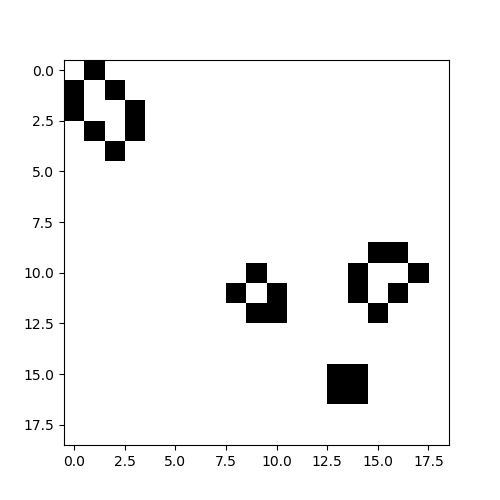

In [11]:
n=19 #dimension del arreglo
Matr=np.random.randint(low=0,high=2, size=(n,n)) # crea la primera configuracion aleatoria,supuestamente, de dimension que se quiera, solo se debe cambiar el parametro n anterior
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
imagen = ax.imshow(Matr, interpolation="none", aspect = "equal", cmap=cm.gray_r)
def animate(i):
    global Matr
    print(i)
    Matr=funcionvecinos(Matr)
    imagen.set_data(Matr)
    print(i)
    return imagen,
anim = animation.FuncAnimation(fig, animate, frames=100, blit=True, interval = 500, repeat = True)
plt.show()